# 爬虫小试牛刀
> 胥嘉政 xjz22@mails.tsinghua.edu.cn

In [1]:
import requests

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/116.0'}
response = requests.get('https://new.qq.com/rain/a/20230823A0A7X100', params={}, headers=headers)
response.encoding = 'UTF-8'

html = response.text
print(html)

<!DOCTYPE html>
<html lang="zh-CN">

<head>
    <title>Salesforce又一笔AI投资！2亿美元领投Hugging Face_腾讯新闻</title>
<meta name="Description" content="智东西（公众号：zhidxcom）编译 |  香草编辑 |  李水青智东西8月23日消息，据The Information报道，AI初创公司Hugging Face近日正在进行D轮融资，由云巨头Salesforce领投，预计获投2亿美元，估值较去年5月翻倍至40亿美元。Salesforce在最...">
<meta name="baidu-site-verification" content="jJeIJ5X7pP" />
  <script src="//js.aq.qq.com/js/aq_common.js"></script>
    <meta charset="utf-8">
<!--[if lte IE 8]><meta http-equiv="refresh" content="0; url=/upgrade.htm"><![endif]-->
</meta>
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no" />
<link rel="shortcut icon" href="https://mat1.gtimg.com/qqcdn/qqindex2021/favicon.ico">
<link rel="dns-prefetch" href="//mat1.gtimg.com">
<link rel="dns-prefetch" href="//imgcache.qq.com">
<link rel="dns-prefetch" href="//pacaio.match.qq.com">
<link rel="dns-prefetch" href="//openapi.inews.qq.com">
<link rel="dns-prefetch

In [2]:
import re
results = re.findall('<p class="one-p">(.*?)</p>', html)
for item in results:
    print(item)

<strong>智东西（公众号：zhidxcom）</strong>
<strong>编译 |  香草</strong>
<strong>编辑 |  李水青</strong>
智东西8月23日消息，据The Information报道，AI初创公司Hugging Face近日正在进行D轮融资，由云巨头Salesforce领投，预计获投2亿美元，估值较去年5月翻倍至40亿美元。
Salesforce在最近几个月积极投入AI领域，创立了2.5亿美元的生成式AI风投基金，并在随后扩大至5亿美元。此外，Salesforce也一直积极为自己的产品推出新的AI功能，与OpenAI合作推出了企业通信平台Slack专用的ChatGPT应用。
一、托管Llama 2等几十万AI模型，两轮融资估值翻倍
Hugging Face成立于2016年，最初专注于开发和提供自然语言处理相关的技术和工具，目前主要提供帮助企业和开发者构建和部署AI模型的社区服务，被称作“机器学习界的GitHub”。Hugging Face目前拥有200多名员工，其平台托管了几十万个AI模型，包括Meta的Llama 2，其客户包括微软、亚马逊、IBM等1万多家公司。
对于不想将数据暴露给OpenAI等AI软件提供商的企业而言，其托管的开源模型很有价值。企业可以在自己的数据上训练定制版本的开源模型，而不是去购买一家公司的专有模型。
2022年5月，Hugging Face宣布完成1亿美元的C轮融资，估值达到了20亿美元。该轮融资由Lux Capital领投，红杉资本和Coatue首次参与跟投，其他跟投的投资方包括Addition、Betaworks等Hugging Face原有的投资方。
而在近日这次2亿美元的D轮融资完成后，Hugging Face的估值将达40亿美元，相较上轮融资时增长了一倍。本轮融资由Salesforce旗下投资机构Salesforce Ventures领投，Salesforce首席执行官马克·贝尼奥夫（Marc Benioff）在其社交媒体X上证实了这一消息。
Hugging Face公司目前的年收入有望超过3000万美元。据The Information推测，Salesforce的这次融资，可能表明它将Hugging Face视为未来的潜在收购对象。
二、狂砸数十亿美元，Salesforce

In [3]:
# <img class="content-picture" src="//inews.gtimg.com/sh_newsapp_bt/0/15817278961/1000" />
img_results = re.findall('<img class="content-picture" src="(.*?)" />', html)
for item in img_results:
    print(item)

//inews.gtimg.com/sh_newsapp_bt/0/15817278960/1000
//inews.gtimg.com/sh_newsapp_bt/0/15817278961/1000
//inews.gtimg.com/sh_newsapp_bt/0/15817278962/1000
//inews.gtimg.com/sh_newsapp_bt/0/15817278963/1000
//inews.gtimg.com/sh_newsapp_bt/0/15817278964/1000


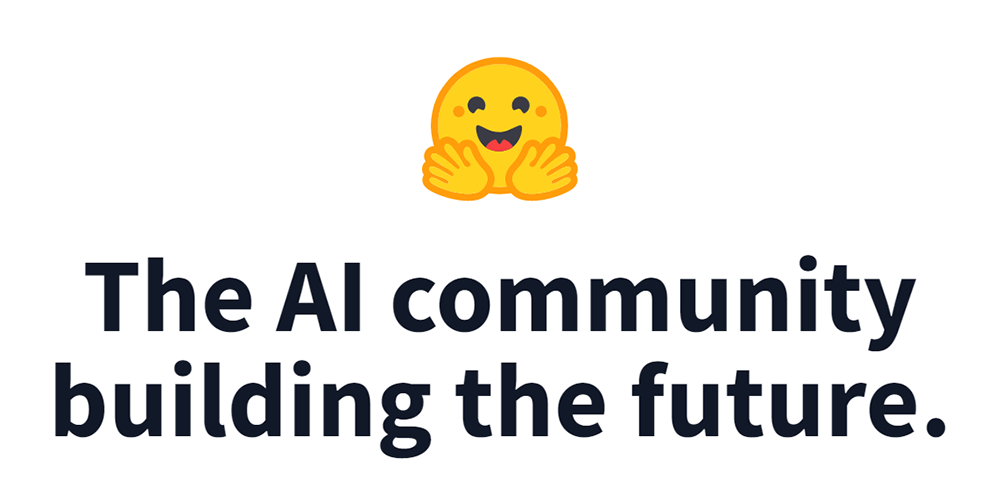

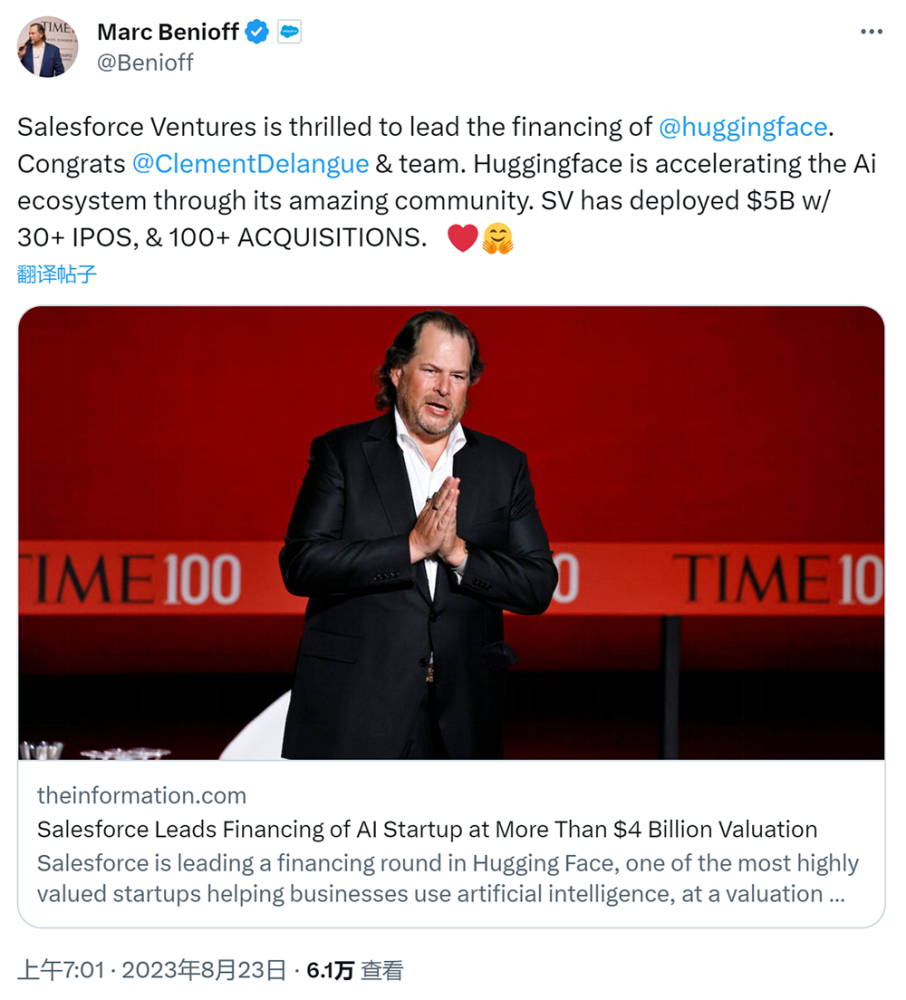

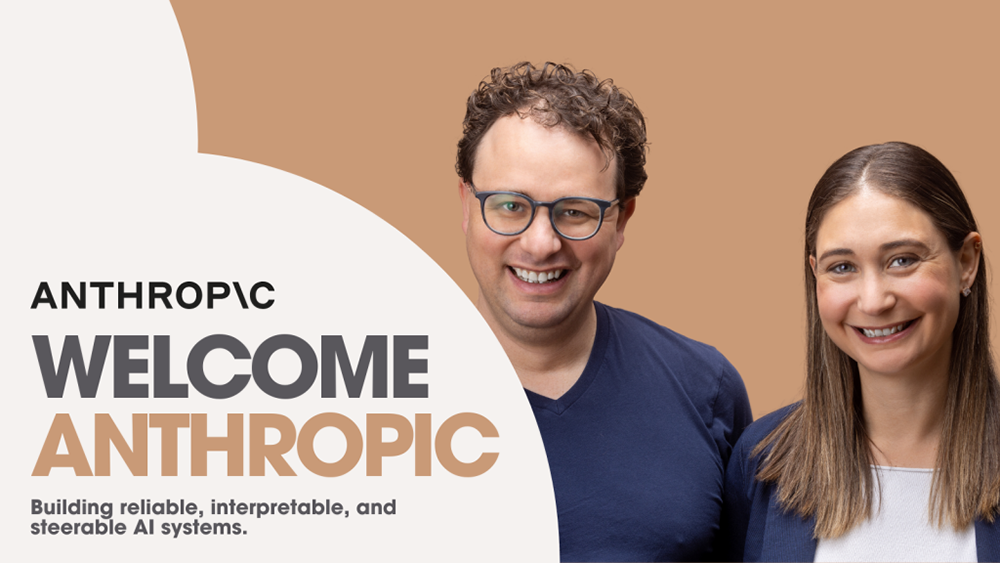

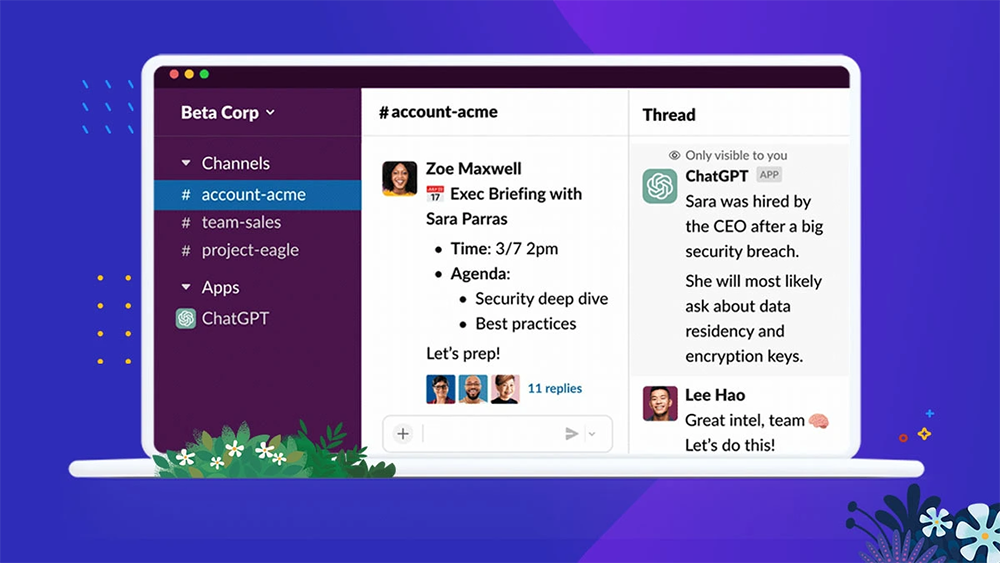

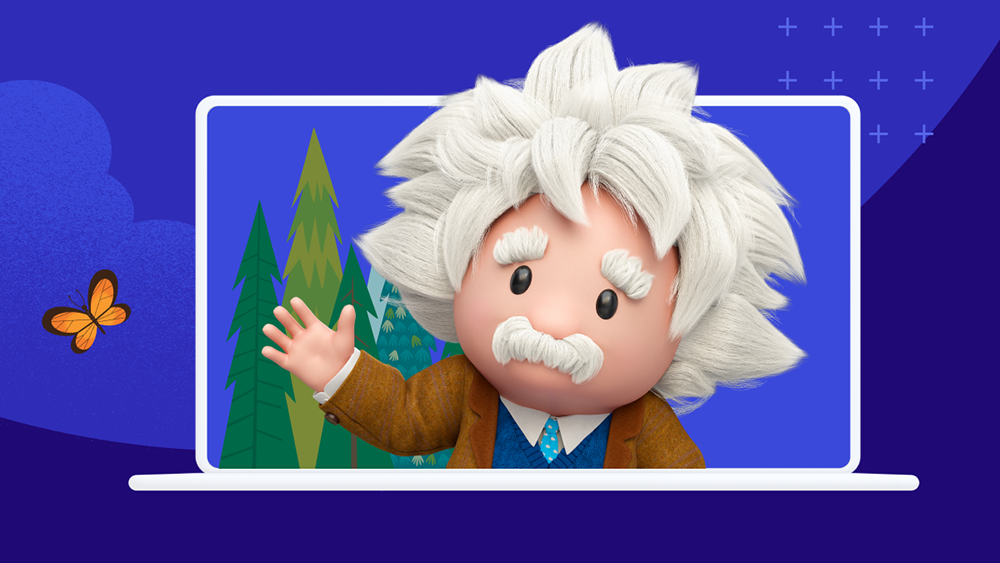

In [4]:
# 把这些网址对应的图片下载下来
import os
from PIL import Image

# 创建一个放图片的文件夹
if not os.path.exists('images'):
    os.mkdir('images')

index = 0
for item in img_results:
    index += 1
    # https://inews.gtimg.com/newsapp_bt/0/15817278961/1000
    # 下载这个网址对应的图片
    # 1. 获取图片的名字
    img_name = item.split('/')[-1] + f'{index}.jpg'
    # 2. 获取图片的二进制数据
    # 根据item网址加上https前缀
    item = 'https:' + item
    img_data = requests.get(item).content
    # 3. 保存到本地
    with open(os.path.join('images', img_name), 'wb') as f:
        f.write(img_data)
        f.close()
    # 4.读取本地图片并展示
    img = Image.open(os.path.join('images', img_name))
    # 在jupyter notebook中展示图片
    display(img)